In [1]:
import os,sys,json
from collections import Counter
from itertools import product 
from core.core_utils import *
from core.categories import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
CORE_FoR_Legacy

{801: 'Artificial Intelligence and Image Processing',
 803: 'Computer Software',
 806: 'Information Systems',
 804: 'Data Format',
 805: 'Distributed Computing',
 807: 'Library and Information Studies',
 802: 'Computation Theory and Mathematics',
 899: 'Other Information and Computing Sciences'}

In [3]:
CORE_FoR

{4602: 'Artificial intelligence',
 4603: 'Computer vision and multimedia computation',
 4611: 'Machine learning',
 4608: 'Human-centred computing',
 4601: 'Applied computing',
 4612: 'Software engineering',
 4604: 'Cybersecurity and privacy',
 4605: 'Data management and data science',
 4606: 'Distributed computing and systems software',
 4607: 'Graphics, augmented reality and games',
 4609: 'Information systems',
 4610: 'Library and information studies',
 4613: 'Theory of computation',
 4699: 'Other information and computing sciences'}

In [4]:
years = ["CORE2020", "CORE2018", "CORE2017", "CORE2014", "CORE2013", "CORE2008"]
# years = ["CORE2020", "CORE2018", "CORE2017", "CORE2014", "CORE2013", "ERA2010", "CORE2008"]

In [5]:
df = read_core_data()

# Field of Research distribution -- CORE 2018 data
print("### Field of Research distribution -- CORE 2018 data")
print("Total: {}\n".format(len(df[df["Year"] == "CORE2018"])))
for k, v in CORE_FoR_Legacy.items():
    conf = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE2018")]
    print(v, len(conf))
#     print(v, len(conf), conf["Acronym"].tolist())

### Field of Research distribution -- CORE 2018 data
Total: 1625

Artificial Intelligence and Image Processing 351
Computer Software 256
Information Systems 234
Data Format 138
Distributed Computing 148
Library and Information Studies 0
Computation Theory and Mathematics 231
Other Information and Computing Sciences 36


In [6]:
df = read_core_data()

color = {
    801: {"A*": "#cc564b","A": "#dd8e87","B": "#e8b3af","C": "#eee"},
    802: {"A*": "#ffbf00","A": "#ffd866","B": "#ffebb2","C": "#eee"},
    803: {"A*": "#45501a","A": "#798c2e","B": "#adc842","C": "#eee"},
    804: {"A*": "#3c6f7d","A": "#5aa7bc","B": "#93cede","C": "#eee"},
    805: {"A*": "#671d5a","A": "#ad3196","B": "#cd83c0","C": "#eee"},
    806: {"A*": "#b25800","A": "#ff7e00","B": "#ffb166","C": "#eee"},
    807: {"A*": "#eee","A": "#eee","B": "#eee","C": "#eee"},
    809: {"A*": "#eee","A": "#eee","B": "#eee","C": "#eee"},
    899: {"A*": "#666","A": "#aaa","B": "#eee","C": "#eee"},
}

## copy and paste the result @ https://observablehq.com/@mbostock/flow-o-matic
## 2008 -- 2018
s_years = [2013, 2014, 2017, 2018]
for y_source, y_target in zip(s_years, s_years[1:]):
    for k, v in CORE_FoR_Legacy.items():
        conf_source = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_source))]
        conf_target = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_target))]
        for r1, r2 in product(["A*", "A", "B", "C"], repeat=2):
            df_1 = [r[0] for r in conf_source[conf_source["Rank"] == r1][["ID"]].values.tolist()]
            df_2 = [r[0] for r in conf_target[conf_target["Rank"] == r2][["ID"]].values.tolist()]
            conf_count = set(df_1).intersection(set(df_2))
            if len(conf_count) == 0: continue
            print("{}({})-{},{}({})-{},{},{}".format(r1, y_source, k, r2, y_target, k, len(conf_count), color[k][r2]))

s_years = [2008, 2013]
for y_source, y_target in zip(s_years, s_years[1:]):
    for k, v in CORE_FoR_Legacy.items():
        conf_source = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_source))]
        conf_target = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_target))]
        for r1, r2 in product(["A*", "A", "B", "C"], repeat=2):
            df_1 = [r[0] for r in conf_source[conf_source["Rank"] == r1][["ID"]].values.tolist()]
            df_2 = [r[0] for r in conf_target[conf_target["Rank"] == r2][["ID"]].values.tolist()]
            conf_count = set(df_1).intersection(set(df_2))
            if len(conf_count) == 0: continue
            print("{}({})-{},{}({})-{},{},{}".format(r1, y_source, k, r2, y_target, k, len(conf_count), color[k][r2]))
          
## 2018 vs 2020
for k_s, v_s in CORE_FoR_Legacy.items():
    for k_t, v_t in CORE_FoR.items():
        conf_source = df.loc[(df["FoR1"] == k_s) & (df["Year"] == "CORE2018")]
        conf_target = df.loc[(df["FoR1"] == k_t) & (df["Year"] == "CORE2020")]
        for r1, r2 in product(["A*", "A", "B", "C"], repeat=2):
            df_1 = [r[0] for r in conf_source[conf_source["Rank"] == r1][["ID"]].values.tolist()]
            df_2 = [r[0] for r in conf_target[conf_target["Rank"] == r2][["ID"]].values.tolist()]
            conf_count = set(df_1).intersection(set(df_2))
            if len(conf_count) == 0: continue
            print("{}({})-{},{}({})-{},{},{}".format(r1, 2018, k_s, r2, 2020, v_t, len(conf_count), color[k_s][r2]))

A*(2013)-801,A*(2014)-801,16,#cc564b
A*(2013)-801,B(2014)-801,1,#e8b3af
A(2013)-801,A(2014)-801,36,#dd8e87
A(2013)-801,B(2014)-801,2,#e8b3af
B(2013)-801,A(2014)-801,3,#dd8e87
B(2013)-801,B(2014)-801,84,#e8b3af
C(2013)-801,C(2014)-801,188,#eee
A*(2013)-803,A*(2014)-803,12,#45501a
A*(2013)-803,A(2014)-803,1,#798c2e
A(2013)-803,A*(2014)-803,1,#45501a
A(2013)-803,A(2014)-803,41,#798c2e
A(2013)-803,B(2014)-803,2,#adc842
B(2013)-803,B(2014)-803,65,#adc842
C(2013)-803,A(2014)-803,1,#798c2e
C(2013)-803,B(2014)-803,1,#adc842
C(2013)-803,C(2014)-803,116,#eee
A*(2013)-806,A*(2014)-806,5,#b25800
A*(2013)-806,A(2014)-806,1,#ff7e00
A(2013)-806,A(2014)-806,27,#ff7e00
A(2013)-806,B(2014)-806,2,#ffb166
B(2013)-806,A(2014)-806,1,#ff7e00
B(2013)-806,B(2014)-806,58,#ffb166
C(2013)-806,B(2014)-806,2,#ffb166
C(2013)-806,C(2014)-806,115,#eee
A*(2013)-804,A*(2014)-804,9,#3c6f7d
A(2013)-804,A(2014)-804,16,#5aa7bc
A(2013)-804,B(2014)-804,1,#93cede
B(2013)-804,A*(2014)-804,1,#3c6f7d
B(2013)-804,A(2014)-804,1,#5a

C(2018)-806,C(2020)-Distributed computing and systems software,8,#eee
B(2018)-806,B(2020)-Graphics, augmented reality and games,2,#ffb166
C(2018)-806,C(2020)-Graphics, augmented reality and games,2,#eee
A(2018)-806,A(2020)-Theory of computation,1,#ff7e00
C(2018)-806,C(2020)-Theory of computation,1,#eee
B(2018)-804,B(2020)-Artificial intelligence,1,#93cede
C(2018)-804,C(2020)-Artificial intelligence,1,#eee
B(2018)-804,B(2020)-Computer vision and multimedia computation,1,#93cede
A(2018)-804,A(2020)-Machine learning,1,#5aa7bc
A(2018)-804,A(2020)-Applied computing,1,#5aa7bc
B(2018)-804,B(2020)-Applied computing,2,#93cede
C(2018)-804,C(2020)-Applied computing,1,#eee
A(2018)-804,A(2020)-Software engineering,1,#5aa7bc
C(2018)-804,C(2020)-Software engineering,3,#eee
A*(2018)-804,A*(2020)-Cybersecurity and privacy,2,#3c6f7d
A(2018)-804,A(2020)-Cybersecurity and privacy,2,#5aa7bc
B(2018)-804,B(2020)-Cybersecurity and privacy,7,#93cede
C(2018)-804,C(2020)-Cybersecurity and privacy,8,#eee
A*(2018)

In [11]:
df = read_core_data()

## copy and paste the result @ https://observablehq.com/@mbostock/flow-o-matic
s_years = [2013, 2014, 2017, 2018]
for y_source, y_target in zip(s_years, s_years[1:]):
    for k, v in CORE_FoR_Legacy.items():
        conf_source = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_source))]
        conf_target = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_target))]
        df_1 = [r[0] for r in conf_source[["ID"]].values.tolist()]
        df_2 = [r[0] for r in conf_target[["ID"]].values.tolist()]
        conf_count = set(df_1).intersection(set(df_2))
        if len(conf_count) == 0: continue
        print("{}-{},{}-{},{},{}".format(y_source, v if y_source == 2013 else k, y_target, v if y_target == 2013 else k, len(conf_count), color[k]["A"]))

s_years = [2008, 2013]
for y_source, y_target in zip(s_years, s_years[1:]):
    for k, v in CORE_FoR_Legacy.items():
        conf_source = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_source))]
        conf_target = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE{}".format(y_target))]
        df_1 = [r[0] for r in conf_source[["ID"]].values.tolist()]
        df_2 = [r[0] for r in conf_target[["ID"]].values.tolist()]
        conf_count = set(df_1).intersection(set(df_2))
        if len(conf_count) == 0: continue
        print("{}-{},{}-{},{},{}".format(y_source, v if y_source == 2013 else k, y_target, v if y_target == 2013 else k, len(conf_count), color[k]["A"]))
            
for k_s, v_s in CORE_FoR_Legacy.items():
    for k_t, v_t in CORE_FoR.items():
        conf_source = df.loc[(df["FoR1"] == k_s) & (df["Year"] == "CORE2018")]
        conf_target = df.loc[(df["FoR1"] == k_t) & (df["Year"] == "CORE2020")]
        df_1 = [r[0] for r in conf_source[["ID"]].values.tolist()]
        df_2 = [r[0] for r in conf_target[["ID"]].values.tolist()]
        conf_count = set(df_1).intersection(set(df_2))
        if len(conf_count) == 0: continue
        print("{}-{},{}-{},{},{}".format(2018, k_s, 2020, v_t, len(conf_count), color[k_s]["A"]))

2013-Artificial Intelligence and Image Processing,2014-801,342,#dd8e87
2013-Computer Software,2014-803,251,#798c2e
2013-Information Systems,2014-806,228,#ff7e00
2013-Data Format,2014-804,139,#5aa7bc
2013-Distributed Computing,2014-805,133,#ad3196
2013-Computation Theory and Mathematics,2014-802,230,#ffd866
2013-Other Information and Computing Sciences,2014-899,35,#aaa
2014-801,2017-801,341,#dd8e87
2014-803,2017-803,253,#798c2e
2014-806,2017-806,229,#ff7e00
2014-804,2017-804,138,#5aa7bc
2014-805,2017-805,134,#ad3196
2014-802,2017-802,228,#ffd866
2014-899,2017-899,35,#aaa
2017-801,2018-801,337,#dd8e87
2017-803,2018-803,250,#798c2e
2017-806,2018-806,226,#ff7e00
2017-804,2018-804,138,#5aa7bc
2017-805,2018-805,134,#ad3196
2017-802,2018-802,228,#ffd866
2017-899,2018-899,35,#aaa
2008-801,2013-Artificial Intelligence and Image Processing,1,#dd8e87
2008-805,2013-Distributed Computing,1,#ad3196
2018-801,2020-Artificial intelligence,96,#dd8e87
2018-801,2020-Computer vision and multimedia computat

In [12]:
df = read_core_data()

# Field of Research distribution -- CORE 2020 data
print("### Field of Research distribution -- CORE 2020 data")
print("Total: {}\n".format(len(df[df["Year"] == "CORE2020"])))
for k, v in CORE_FoR.items():
    conf = df.loc[df["FoR1"] == k]
    print(v, len(conf))
#     print(v, len(conf), conf["Acronym"].tolist())

### Field of Research distribution -- CORE 2020 data
Total: 889

Artificial intelligence 128
Computer vision and multimedia computation 41
Machine learning 18
Human-centred computing 54
Applied computing 56
Software engineering 103
Cybersecurity and privacy 77
Data management and data science 63
Distributed computing and systems software 181
Graphics, augmented reality and games 35
Information systems 0
Library and information studies 0
Theory of computation 89
Other information and computing sciences 0


In [13]:
ai_conf = df.loc[df["FoR1"] == 4602]["Acronym"].tolist()
ml_conf = df.loc[df["FoR1"] == 4611]["Acronym"].tolist()

In [14]:
# Ranking changes -- [2020, 2018, 2017, 2014, 2013, ERA2010, 2018]
for cname in ai_conf+ml_conf:
    data = df.loc[df["Acronym"] == cname]
    print(cname, [r[0] for r in data[["Rank"]].values.tolist()])

EC ['A*', 'A*', 'B', 'B', 'B', 'B', 'A']
CogSci ['A', 'A', 'A', 'A', 'A', 'A', 'A']
COLT ['A*', 'A*', 'A*', 'A*', 'A*', 'A', 'A*']
NLDB ['C', 'C', 'C', 'C', 'C', 'C', 'C']
IES ['C', 'C', 'C', 'C', 'C', 'C', 'L']
ACL ['A*', 'A*', 'A*', 'A*', 'A*', 'A', 'A*']
ACRA ['Australasian C', 'Australasian', 'Australasian', 'Australasian', 'Australasian', 'B', 'B']
AI ['Australasian C', 'Australasian', 'Australasian', 'C', 'Australasian', 'C', 'Australasian', 'B', 'C']
ALTA ['Australasian B', 'Australasian', 'Australasian', 'Australasian', 'Australasian', 'B']
SST ['Australasian C', 'Australasian', 'Australasian', 'Australasian', 'Australasian', 'B', 'B']
ACALCI ['Australasian B', 'Australasian', 'Australasian', 'Australasian', 'Australasian', 'B', 'B']
UAI ['A*', 'A*', 'A*', 'A*', 'A*', 'A', 'A*']
AMTA ['B', 'B', 'B', 'B', 'B', 'B']
APORS ['C', 'C', 'C', 'C', 'C', 'C', 'C']
EAMT ['B', 'B', 'B', 'B', 'B', 'B']
PACLING ['B', 'B', 'B', 'B', 'B', 'B', 'B']
COCOA ['B', 'B', 'B', 'B', 'B', 'B', 'B']
EM

In [15]:
# Few interesting examples
examples = ["EC", "WSDM", "AISTATS", "TIME", "ALT"]
for cname in examples:
    data = df.loc[df["Acronym"] == cname]
    print(cname, [r[0] for r in data[["Rank"]].values.tolist()])

EC ['A*', 'A*', 'B', 'B', 'B', 'B', 'A']
WSDM ['A*', 'A*', 'A*', 'A*', 'B', 'B']
AISTATS ['A', 'A', 'A', 'A', 'B', 'B']
TIME ['B', 'B', 'B', 'B', 'A', 'A', 'A']
ALT ['B', 'B', 'B', 'B', 'A', 'A']


In [16]:
# Ranking changes by field of research
for k, v in CORE_FoR.items():
    conf = df.loc[df["FoR1"] == k]["ID"].tolist()
    filtereddf = df.loc[df["ID"].isin(conf)]
    print(v)
    for y in years:
        values = filtereddf.loc[filtereddf["Year"] == y][["Rank"]].values
        cc = Counter([r[0] for r in values])
        print("\t{} \t A*: {}, A: {}, B: {}, C: {}, else: {}".format(y, cc["A*"], cc["A"], cc["B"], cc["C"], len(values)-cc["A*"]-cc["A"]-cc["B"]-cc["C"]))

Artificial intelligence
	CORE2020 	 A*: 11, A: 20, B: 36, C: 35, else: 26
	CORE2018 	 A*: 11, A: 20, B: 38, C: 48, else: 11
	CORE2017 	 A*: 10, A: 20, B: 39, C: 47, else: 8
	CORE2014 	 A*: 10, A: 20, B: 36, C: 50, else: 8
	CORE2013 	 A*: 10, A: 21, B: 35, C: 50, else: 6
	CORE2008 	 A*: 10, A: 23, B: 25, C: 8, else: 2
Computer vision and multimedia computation
	CORE2020 	 A*: 3, A: 3, B: 16, C: 13, else: 6
	CORE2018 	 A*: 3, A: 3, B: 16, C: 16, else: 3
	CORE2017 	 A*: 2, A: 4, B: 18, C: 16, else: 1
	CORE2014 	 A*: 2, A: 5, B: 17, C: 16, else: 1
	CORE2013 	 A*: 2, A: 5, B: 17, C: 15, else: 1
	CORE2008 	 A*: 2, A: 13, B: 6, C: 2, else: 0
Machine learning
	CORE2020 	 A*: 2, A: 5, B: 4, C: 4, else: 3
	CORE2018 	 A*: 2, A: 5, B: 5, C: 5, else: 1
	CORE2017 	 A*: 2, A: 5, B: 5, C: 5, else: 1
	CORE2014 	 A*: 2, A: 5, B: 5, C: 5, else: 1
	CORE2013 	 A*: 2, A: 6, B: 4, C: 5, else: 0
	CORE2008 	 A*: 2, A: 5, B: 3, C: 0, else: 0
Human-centred computing
	CORE2020 	 A*: 4, A: 10, B: 16, C: 12, else: 

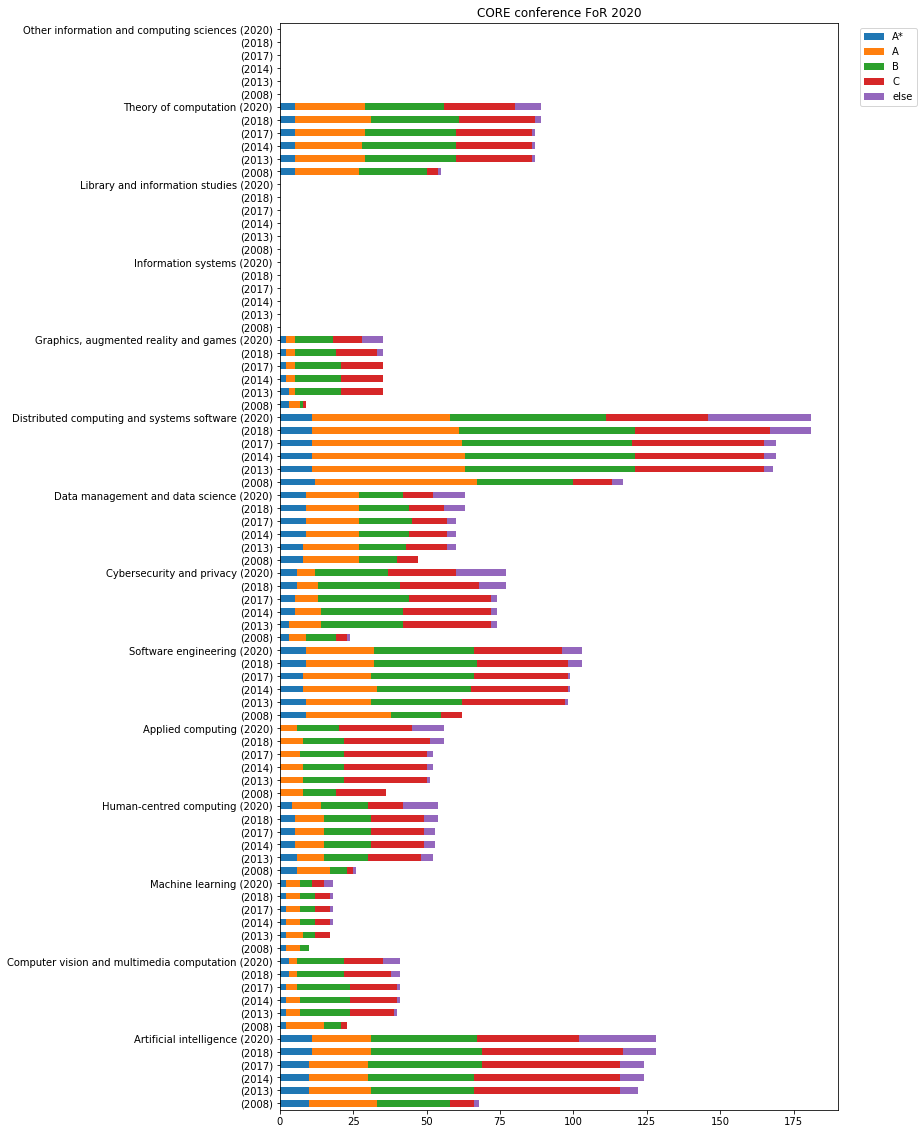

In [17]:
df = read_core_data()

s_years = [2008, 2013, 2014, 2017, 2018, 2020]
data = { "A*": [], "A": [], "B": [], "C": [], "else": [] }
new_index = []

# for k, v, in {4602: "Artificial intelligence"}.items():
for k, v in CORE_FoR.items():
    for y in s_years:
        if y == 2020:
            new_index.append("{} ({})".format(v, y))
        else:
            new_index.append("({})".format(y))
        conf = df.loc[df["FoR1"] == k]["ID"].tolist()
        filtereddf = df.loc[df["ID"].isin(conf)]
        values = filtereddf.loc[filtereddf["Year"] == "CORE{}".format(y)][["Rank"]].values
        cc = Counter([r[0] for r in values])
        data["A*"].append(cc["A*"])
        data["A"].append(cc["A"])
        data["B"].append(cc["B"])
        data["C"].append(cc["C"])
        data["else"].append(len(values)-cc["A*"]-cc["A"]-cc["B"]-cc["C"])
        
plot_df = pd.DataFrame(data, index=new_index)
ax = plot_df.plot.barh(stacked=True);
ax.figure.set_size_inches(10,20)
ax.set_title("CORE conference FoR 2020")
ax.legend(bbox_to_anchor=(1.15, 1.0))

In [18]:
conf_2020 = df.loc[df["Year"] == "CORE2020"][["Acronym"]].values.tolist()
conf_2018 = df.loc[df["Year"] == "CORE2018"][["Acronym"]].values.tolist()
# print(conf_2014)
removed_conf = []
for c in conf_2018:
    if c not in conf_2020:
        removed_conf.append(c[0])
print("These conferences ({}) are removed in 2020".format(len(removed_conf)))
print(removed_conf)

These conferences (716) are removed in 2020
['ProjMAN', 'APCHI', 'ICALT', 'APCHDL', 'EUSIPCO', 'ICC', 'ICON', 'IEEE RFID', 'IM', 'CIRSYS', 'Sensor Networks', 'PCNS', 'WTASA', 'SCSS', 'Emnets', 'CCW', 'CDC', 'ECBS', 'ISIC', 'WORDS', 'BC', 'COMPDES', 'VLSI', 'AFETE', 'ICEE', 'EuroBot', 'FIRA', 'RFF', 'M2VIP', 'RS', 'APCOMin', 'GeoComp', 'ISSDI', 'JECGI', 'SIRC', 'SIST', 'CxS', 'BASYS', 'ASCILITE', 'AUCADC', 'ACMA', 'ACEC', 'WIC', 'OzWIT', 'CEG', 'ESGICT', 'GCCCE', 'GHC', 'IEE', 'ICHIT', 'FMOOD', 'WWCA', 'ITiRA', 'SAINT', 'CCSC', 'LI', 'SRIG-ET', 'P2P Econ', 'SIDEKIC', 'AFAANZ', 'SIGCHI-NZ', 'Group', 'WIDM', 'ACM-SIGMIS CPR', 'ADVIS', 'AMCIS', 'IAIM', 'DSI', 'OCIS', 'APRSAIS', 'AISP', 'ACIS', 'AURISA', 'AUIC', 'ANZAM', 'ANZIIS', 'ANZMAC', 'AGDC', 'WarSec', 'MCDA', 'CollECTeR', 'CISTM', 'SIGOA', 'CATAC', 'DASWIS', 'DUX', 'Dcw', 'ECIW', 'ECIME', 'ECIS', 'EKM', 'ECRM', 'EuroNLG', 'EMCIS', 'GDC', 'GISPlanet', 'GITMA', 'HICSS', 'ECOWS', 'IARTW', 'IEEE DEST', 'EEE', 'P2P', 'WSE', 'AMIGE', 'HotW

In [19]:
### KIISE ranking (The Korean Institute of Information Scientists and Engineers)
kiise_df = read_kiise_fos_data()
kiise_df_s = kiise_df[kiise_df["Year"] == 2018]

# Field of Research distribution -- KIISE 2018 data
print("### Field of Research distribution -- KIISE 2018 data\n")
for k, v in CORE_FoR.items():
    conf = kiise_df_s.loc[kiise_df_s["FoR1"] == k]
    print(v, len(conf))

### Field of Research distribution -- KIISE 2018 data

Artificial intelligence 13
Computer vision and multimedia computation 6
Machine learning 3
Human-centred computing 10
Applied computing 5
Software engineering 25
Cybersecurity and privacy 16
Data management and data science 14
Distributed computing and systems software 53
Graphics, augmented reality and games 11
Information systems 0
Library and information studies 0
Theory of computation 13
Other information and computing sciences 0


In [20]:
CCF_FoR

{1: 'Computer System and High Performance Computing',
 2: 'Computer Network',
 3: 'Network and Information Security',
 4: 'Software engineering and Programming language',
 5: 'Database, Data mining and Information retrieval',
 6: 'Computer Science Theory',
 7: 'Computer Graphics and Multimedia',
 8: 'Artificial Intelligence and Pattern Recognition',
 9: 'Human-computer interaction and ubiquitous computing',
 10: 'Frontier, intersection and integration'}

In [21]:
### CCF ranking (China Computer Federation)
ccf_df = read_ccf_fos_data()
ccf_df_s = ccf_df[ccf_df["Year"] == 2019]

# Field of Research distribution -- KIISE 2018 data
for k, v in CCF_FoR.items():
    conf = ccf_df_s.loc[ccf_df_s["FoR1"] == v]
    print(v, len(conf))

Computer System and High Performance Computing 61
Computer Network 33
Network and Information Security 41
Software engineering and Programming language 54
Database, Data mining and Information retrieval 28
Computer Science Theory 23
Computer Graphics and Multimedia 29
Artificial Intelligence and Pattern Recognition 40
Human-computer interaction and ubiquitous computing 23
Frontier, intersection and integration 14


/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [22]:
#### Compare with CORE 2020 (only A* and A)
core_df = read_core_data()
core_df_s = core_df[core_df["Year"] == "CORE2020"]

for k, v in CORE_FoR.items():
    kiise_conf = kiise_df_s.loc[kiise_df_s["FoR1"] == k]
    core_conf = core_df_s.loc[(core_df_s["FoR1"] == k) & ((core_df_s["Rank"] == "A*")|(core_df_s["Rank"] == "A"))]
    print("{} \t KIISE: {}, CORE: {}".format(v, len(kiise_conf), len(core_conf)))
#     print("KIISE: {}".format(sorted([r[0] for r in kiise_conf[["Acronym"]].values.tolist()])))
#     print("CORE: {}".format(sorted([r[0] for r in core_conf[["Acronym"]].values.tolist()])))
    print()


Artificial intelligence 	 KIISE: 13, CORE: 31

Computer vision and multimedia computation 	 KIISE: 6, CORE: 6

Machine learning 	 KIISE: 3, CORE: 7

Human-centred computing 	 KIISE: 10, CORE: 14

Applied computing 	 KIISE: 5, CORE: 6

Software engineering 	 KIISE: 25, CORE: 32

Cybersecurity and privacy 	 KIISE: 16, CORE: 12

Data management and data science 	 KIISE: 14, CORE: 27

Distributed computing and systems software 	 KIISE: 53, CORE: 58

Graphics, augmented reality and games 	 KIISE: 11, CORE: 5

Information systems 	 KIISE: 0, CORE: 0

Library and information studies 	 KIISE: 0, CORE: 0

Theory of computation 	 KIISE: 13, CORE: 29

Other information and computing sciences 	 KIISE: 0, CORE: 0



In [23]:
# KIISE Ranking changes by field of research
for k, v in CORE_FoR.items():
    conf = kiise_df.loc[kiise_df["FoR1"] == k]["Acronym"].tolist()
    filtereddf = kiise_df.loc[kiise_df["Acronym"].isin(conf)]
    print(v)
    for y in [2018, 2016, 2014]:
        values = filtereddf.loc[filtereddf["Year"] == y][["Rank"]].values
        cc = Counter([r[0] for r in values])
        print("\t{} \t S: {}, A: {}, else: {}".format(y, cc["S"], cc["A"], len(values)-cc["S"]-cc["A"]))

Artificial intelligence
	2018 	 S: 4, A: 9, else: 0
	2016 	 S: 4, A: 13, else: 0
	2014 	 S: 4, A: 15, else: 0
Computer vision and multimedia computation
	2018 	 S: 3, A: 3, else: 0
	2016 	 S: 3, A: 5, else: 0
	2014 	 S: 3, A: 6, else: 0
Machine learning
	2018 	 S: 2, A: 1, else: 0
	2016 	 S: 2, A: 1, else: 0
	2014 	 S: 2, A: 0, else: 0
Human-centred computing
	2018 	 S: 3, A: 7, else: 0
	2016 	 S: 2, A: 8, else: 0
	2014 	 S: 3, A: 8, else: 0
Applied computing
	2018 	 S: 1, A: 4, else: 0
	2016 	 S: 1, A: 4, else: 0
	2014 	 S: 0, A: 5, else: 0
Software engineering
	2018 	 S: 9, A: 16, else: 0
	2016 	 S: 9, A: 15, else: 0
	2014 	 S: 9, A: 14, else: 0
Cybersecurity and privacy
	2018 	 S: 6, A: 10, else: 0
	2016 	 S: 6, A: 9, else: 0
	2014 	 S: 6, A: 8, else: 0
Data management and data science
	2018 	 S: 9, A: 5, else: 0
	2016 	 S: 9, A: 5, else: 0
	2014 	 S: 10, A: 4, else: 0
Distributed computing and systems software
	2018 	 S: 19, A: 34, else: 0
	2016 	 S: 19, A: 34, else: 0
	2014 	 S: 9

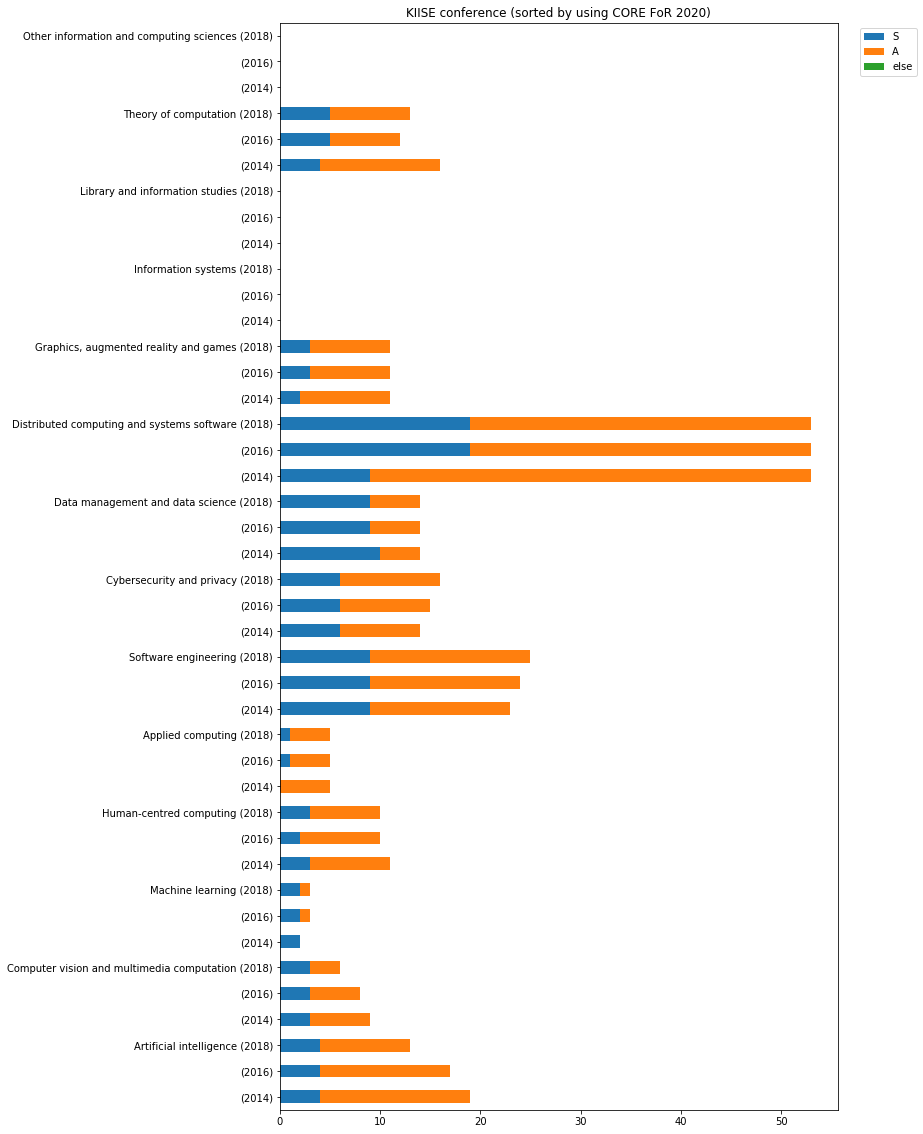

In [24]:
s_years = [2014, 2016, 2018]
data = { "S": [], "A": [], "else": [] }
new_index = []

for k, v in CORE_FoR.items():
    for y in s_years:
        if y == 2018:
            new_index.append("{} ({})".format(v, y))
        else:
            new_index.append("({})".format(y))
        conf = kiise_df.loc[kiise_df["FoR1"] == k]["Acronym"].tolist()
        filtereddf = kiise_df.loc[kiise_df["Acronym"].isin(conf)]
        values = filtereddf.loc[filtereddf["Year"] == y][["Rank"]].values
        cc = Counter([r[0] for r in values])
        data["S"].append(cc["S"])
        data["A"].append(cc["A"])
        data["else"].append(len(values)-cc["S"]-cc["A"])
        
plot_df = pd.DataFrame(data, index=new_index)
ax = plot_df.plot.barh(stacked=True);
ax.figure.set_size_inches(10,20)
ax.set_title("KIISE conference (sorted by using CORE FoR 2020)")
ax.legend(bbox_to_anchor=(1.15, 1.0))

In [25]:
# CCF Ranking changes by field of research
for k, v in CCF_FoR.items():
    conf = ccf_df.loc[ccf_df["FoR1"] == v]["Acronym"].tolist()
    filtereddf = ccf_df.loc[ccf_df["Acronym"].isin(conf)]
    print(v)
    for y in [2019, 2015, 2012]:
        values = filtereddf.loc[filtereddf["Year"] == y][["Rank"]].values
        cc = Counter([r[0] for r in values])
        print("\t{} \t A: {}, B: {}, C: {}, else: {}".format(y, cc["A"], cc["B"], cc["C"], len(values)-cc["A"]-cc["B"]-cc["C"]))

Computer System and High Performance Computing
	2019 	 A: 9, B: 26, C: 26, else: 0
	2015 	 A: 8, B: 26, C: 27, else: 0
	2012 	 A: 5, B: 26, C: 26, else: 0
Computer Network
	2019 	 A: 4, B: 10, C: 19, else: 0
	2015 	 A: 3, B: 11, C: 18, else: 0
	2012 	 A: 3, B: 11, C: 17, else: 0
Network and Information Security
	2019 	 A: 5, B: 12, C: 24, else: 0
	2015 	 A: 5, B: 12, C: 24, else: 0
	2012 	 A: 5, B: 12, C: 20, else: 0
Software engineering and Programming language
	2019 	 A: 9, B: 20, C: 25, else: 0
	2015 	 A: 8, B: 21, C: 25, else: 0
	2012 	 A: 7, B: 20, C: 22, else: 0
Database, Data mining and Information retrieval
	2019 	 A: 6, B: 11, C: 12, else: 0
	2015 	 A: 6, B: 11, C: 12, else: 0
	2012 	 A: 5, B: 11, C: 13, else: 0
Computer Science Theory
	2019 	 A: 5, B: 8, C: 10, else: 0
	2015 	 A: 4, B: 8, C: 10, else: 0
	2012 	 A: 3, B: 7, C: 10, else: 0
Computer Graphics and Multimedia
	2019 	 A: 4, B: 13, C: 12, else: 0
	2015 	 A: 4, B: 12, C: 11, else: 0
	2012 	 A: 3, B: 11, C: 10, else: 0

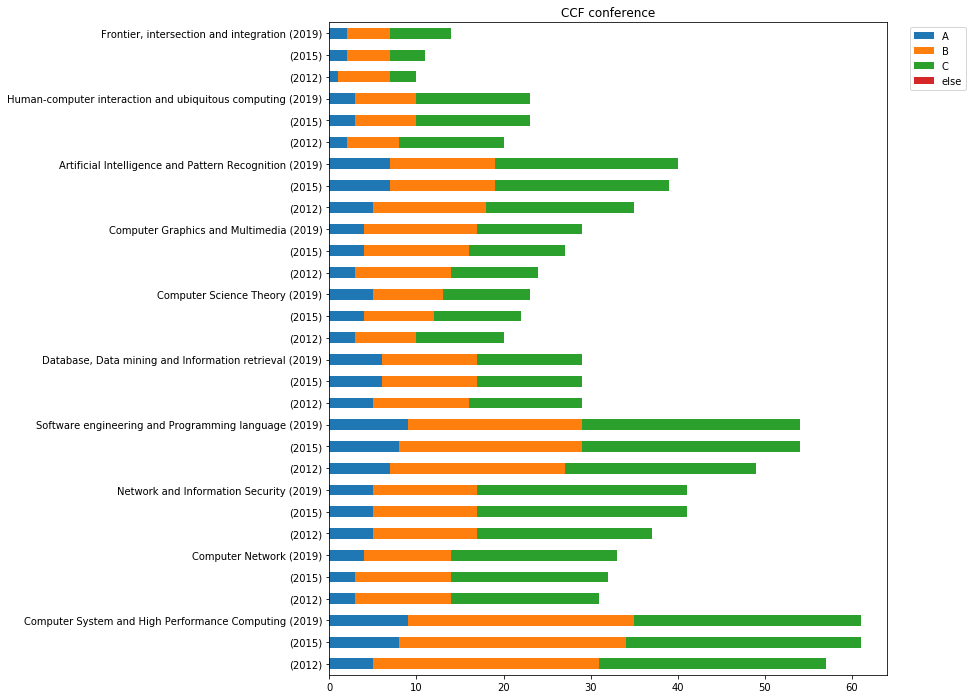

In [26]:
s_years = [2012, 2015, 2019]
data = { "A": [], "B": [], "C": [], "else": [] }
new_index = []

for k, v in CCF_FoR.items():
    for y in s_years:
        if y == 2019:
            new_index.append("{} ({})".format(v, y))
        else:
            new_index.append("({})".format(y))
        conf = ccf_df.loc[ccf_df["FoR1"] == v]["Acronym"].tolist()
        filtereddf = ccf_df.loc[ccf_df["Acronym"].isin(conf)]
        values = filtereddf.loc[filtereddf["Year"] == y][["Rank"]].values
        cc = Counter([r[0] for r in values])
        data["A"].append(cc["A"])
        data["B"].append(cc["B"])
        data["C"].append(cc["C"])
        data["else"].append(len(values)-cc["A"]-cc["B"]-cc["C"])
        
plot_df = pd.DataFrame(data, index=new_index)
ax = plot_df.plot.barh(stacked=True);
ax.figure.set_size_inches(10,12)
ax.set_title("CCF conference")
ax.legend(bbox_to_anchor=(1.15, 1.0))